# Tarea Nro. 2 - PANDAS

- Nombre y Apellido: David Aguilar
- Fecha:             8/11/2020  

En esta tarea se examinara datos de terremotos. Comience importando pandas, numpy y matplolib.

Los datos de los terremotos están localizados en usgs_terremotos_2014.csv. Ni siquiera necesita descargalo, puede abrilo directamente con Pandas.

A continuación resuelva los siguientes items. 

In [2]:
import pandas as pd

### 1) Use la función read_csv de Pandas directamente en esta url para abrirla como un DataFrame

(No use ninguna opción especial). Mostrar las primeras filas y la información del marco de datos.
Debería haber visto que las fechas no se analizaron automáticamente en tipos de fecha y hora.

In [3]:
df = pd.read_csv('usgs_terremotos_2014.csv')


### 2) Vuelva a leer los datos de tal manera que todas las columnas de fechas se identifiquen como fechas y la identificación del terremoto se use como índice

In [4]:
newdf = pd.read_csv('usgs_terremotos_2014.csv',parse_dates=['time','updated'],index_col ='id',sep = ',')
newdf

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,updated,place,type
id,,,,,,,,,,,,,,
ak11155107,2014-01-31 23:53:37.000,60.252000,-152.708100,90.20,1.10,ml,NaN,NaN,NaN,0.2900,ak,2014-02-05 19:34:41.515000+00:00,"26km S of Redoubt Volcano, Alaska",earthquake
nn00436847,2014-01-31 23:48:35.452,37.070300,-115.130900,0.00,1.33,ml,4.0,171.43,0.342000,0.0247,nn,2014-02-01 01:35:09+00:00,"32km S of Alamo, Nevada",earthquake
ak11151142,2014-01-31 23:47:24.000,64.671700,-149.252800,7.10,1.30,ml,NaN,NaN,NaN,1.0000,ak,2014-02-01 00:03:53.010000+00:00,"12km NNW of North Nenana, Alaska",earthquake
ak11151135,2014-01-31 23:30:54.000,63.188700,-148.957500,96.50,0.80,ml,NaN,NaN,NaN,1.0700,ak,2014-01-31 23:41:25.007000+00:00,"22km S of Cantwell, Alaska",earthquake
ci37171541,2014-01-31 23:30:52.210,32.616833,-115.692500,10.59,1.34,ml,6.0,285.00,0.043210,0.2000,ci,2014-02-01 00:13:20.107000+00:00,"10km WNW of Progreso, Mexico",earthquake
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ak11453391,2014-12-01 00:10:16.000,60.963900,-146.762900,14.80,3.80,ml,NaN,NaN,NaN,0.6900,ak,2015-03-24 18:25:07.628000+00:00,"29km SW of Valdez, Alaska",earthquake
ak11453395,2014-12-01 00:09:39.000,58.869100,-154.415900,108.40,2.40,ml,NaN,NaN,NaN,0.6700,ak,2014-12-10 01:04:25.209000+00:00,"102km SSE of Old Iliamna, Alaska",earthquake
nc72358451,2014-12-01 00:09:25.350,38.843498,-122.825836,2.37,0.43,md,8.0,107.00,0.008991,0.0300,nc,2014-12-01 01:15:02.814000+00:00,"9km WNW of Cobb, California",earthquake


### 3) Obtener las estadísticas básicas de todas las columnas

In [5]:
newdf.describe()


,latitude,longitude,depth,mag,nst,gap,dmin,rms
count,120108.000000,120108.000000,120107.000000,120065.000000,59688.000000,94935.000000,85682.000000,119716.000000
mean,38.399579,-99.961402,28.375029,1.793958,17.878284,124.048978,0.893198,0.358174
std,21.938258,82.996858,62.215416,1.343466,14.911369,68.518595,2.903966,0.364046
min,-73.462000,-179.998900,-9.900000,-0.970000,0.000000,9.000000,0.000000,0.000000
25%,34.228917,-147.742025,4.100000,0.820000,8.000000,74.000000,0.020760,0.070000
50%,38.805300,-120.832000,9.200000,1.400000,14.000000,107.000000,0.073670,0.200000
75%,53.889500,-116.068100,22.880000,2.400000,22.000000,155.000000,0.447000,0.590000
max,86.651400,179.998000,697.360000,8.200000,365.000000,356.400000,64.498000,8.460000


### 4) Obtener los 20 terremotos más importantes por magnitud

Examina la estructura de la columna `place`. La información del país parece estar allí. ¿Cómo lo sacarías?

In [6]:
newdf.sort_values(by="mag", ascending=False).head(20).loc[:,['mag','place']]


,mag,place
id,,
usc000nzvd,8.2,"94km NW of Iquique, Chile"
usc000rki5,7.9,"19km SE of Little Sitkin Island, Alaska"
usc000p27i,7.7,"53km SW of Iquique, Chile"
usc000phx5,7.6,"93km SSE of Kirakira, Solomon Islands"
usb000pr89,7.5,"70km SW of Panguna, Papua New Guinea"
usc000piqj,7.4,"112km S of Kirakira, Solomon Islands"
usb000slwn,7.3,"74km S of Intipuca, El Salvador"
usb000pq41,7.2,"33km ESE of Petatlan, Mexico"
usc000pft9,7.1,"56km WSW of Panguna, Papua New Guinea"


### 5) Extraiga el país utilizando las funciones de datos de texto de Pandas 

Agréguelo como una nueva columna al dataframe. (¿Es realmente solo un país? No, algunas filas tienen el nombre de un estado de EE. UU.) Corrija esto https://www.geeksforgeeks.org/python-pandas-working-with-text-data/. 

Otra librería que puede ser útil https://pypi.org/project/us/ para identificar si es un estado de EEUU es `us`



In [106]:
import us
aux = newdf["place"].str.split(",", n = 1, expand = True)
newdf['country'] = aux[1]

newdf
#st = us.states.lookup('alaska').name

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,updated,place,type,country
id,,,,,,,,,,,,,,,
ak11155107,2014-01-31 23:53:37.000,60.252000,-152.708100,90.20,1.10,ml,NaN,NaN,NaN,0.2900,ak,2014-02-05 19:34:41.515000+00:00,"26km S of Redoubt Volcano, Alaska",earthquake,Alaska
nn00436847,2014-01-31 23:48:35.452,37.070300,-115.130900,0.00,1.33,ml,4.0,171.43,0.342000,0.0247,nn,2014-02-01 01:35:09+00:00,"32km S of Alamo, Nevada",earthquake,Nevada
ak11151142,2014-01-31 23:47:24.000,64.671700,-149.252800,7.10,1.30,ml,NaN,NaN,NaN,1.0000,ak,2014-02-01 00:03:53.010000+00:00,"12km NNW of North Nenana, Alaska",earthquake,Alaska
ak11151135,2014-01-31 23:30:54.000,63.188700,-148.957500,96.50,0.80,ml,NaN,NaN,NaN,1.0700,ak,2014-01-31 23:41:25.007000+00:00,"22km S of Cantwell, Alaska",earthquake,Alaska
ci37171541,2014-01-31 23:30:52.210,32.616833,-115.692500,10.59,1.34,ml,6.0,285.00,0.043210,0.2000,ci,2014-02-01 00:13:20.107000+00:00,"10km WNW of Progreso, Mexico",earthquake,Mexico
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ak11453391,2014-12-01 00:10:16.000,60.963900,-146.762900,14.80,3.80,ml,NaN,NaN,NaN,0.6900,ak,2015-03-24 18:25:07.628000+00:00,"29km SW of Valdez, Alaska",earthquake,Alaska
ak11453395,2014-12-01 00:09:39.000,58.869100,-154.415900,108.40,2.40,ml,NaN,NaN,NaN,0.6700,ak,2014-12-10 01:04:25.209000+00:00,"102km SSE of Old Iliamna, Alaska",earthquake,Alaska
nc72358451,2014-12-01 00:09:25.350,38.843498,-122.825836,2.37,0.43,md,8.0,107.00,0.008991,0.0300,nc,2014-12-01 01:15:02.814000+00:00,"9km WNW of Cobb, California",earthquake,California


### 6) Encuentra los 10 países con el mayor número de terremotos

### 7) Encuentra los 10 principales países donde ocurrieron los terremotos más fuertes y más débiles

 

### 8) Cree un conjunto de datos filtrado que solo tenga terremotos de magnitud 4 o mayores 


In [110]:
mag4 = newdf[newdf.mag>4]
mag4.loc[:,['mag']]

,mag
id,
usc000mqlp,4.2
usc000mqln,4.3
usc000mqls,4.4
usc000mf1x,4.2
usc000mqlm,4.3
...,...
usc000t6yh,4.4
usc000t6y2,4.3
usc000t6y1,4.3


### 9) Analice la distribución de las magnitudes del terremoto en la distribución filtrada
Haga un histograma del conteo del terremoto versus la magnitud. Asegúrese de usar una escala logarítmica.


Text(0, 0.5, 'Count')

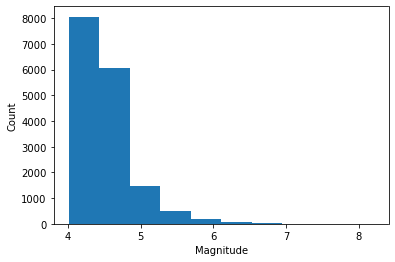

In [112]:
import matplotlib.pyplot as plt
plt.hist(mag4.mag.dropna())
plt.xlabel("Magnitude")
plt.ylabel("Count")

### 10) Visualice la ubicación de los terremotos haciendo un diagrama de dispersión de su latitud y longitud.

#### Usa los datos filtrados. Coloréalo por magnitud.



Ej. plt.scatter(x, y, s=s, c=c, cmap=plt.cm.Oranges)

Con s y c podemos modificar el tamaño y el color respectivamente. Para el color, a cada valor numérico se le asigna un color a través de un mapa de colores; ese mapa se puede cambiar con el argumento cmap. Esa correspondencia se puede visualizar llamando a la función colorbar.

```

N = 100
x = np.random.randn(N)
y = np.random.randn(N)
s = 50 + 50 * np.random.randn(N)
c = np.random.randn(N)

plt.scatter(x, y, s=s, c=c, cmap=plt.cm.Blues)
plt.colorbar()

```
Ref. adicional para colores: https://github.com/lsantiago/PythonBasico/raw/d36d9571a1ff6a2df8364a9055f71d70eddd9151/NumpyMatplotlib/plot_colormaps.png


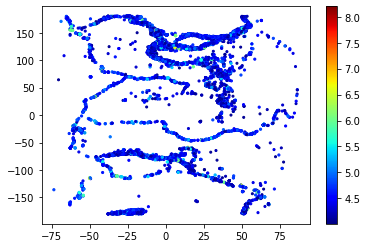

In [132]:
x = mag4.latitude
y = mag4.longitude
s = mag4.mag
c = mag4.mag
plt.scatter(x,y,s=s,c=c, cmap=plt.cm.jet)
plt.colorbar()

### 11) Haz lo mismo para la profundidad 

Text(0, 0.5, 'Count')

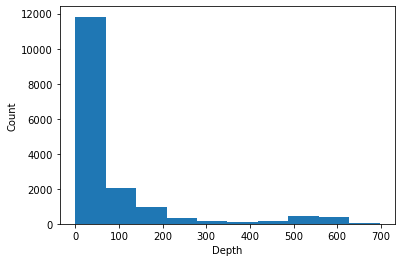

In [137]:
plt.hist(mag4.depth.dropna())
plt.xlabel("Depth")
plt.ylabel("Count")



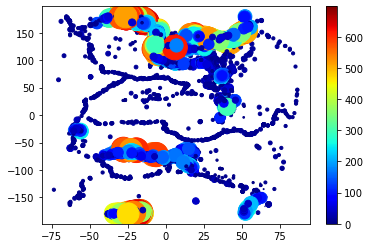

In [136]:
x = mag4.latitude
y = mag4.longitude
s = mag4.depth
c = mag4.depth
plt.scatter(x,y,s=s,c=c, cmap=plt.cm.jet)
plt.colorbar()